#Trabalho 5 Unidade 1

Aluna: Anelma Silva da Costa

Disciplina: Algoritmo e Estrutura de Dados II

Professor: Ivanovitch

#Bibliotecas utilizadas no trabalho

In [ ]:
pip install osmnx

In [ ]:
import osmnx as ox
import osmnx as oy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd

#Download da redes dos bairros que seram analisados

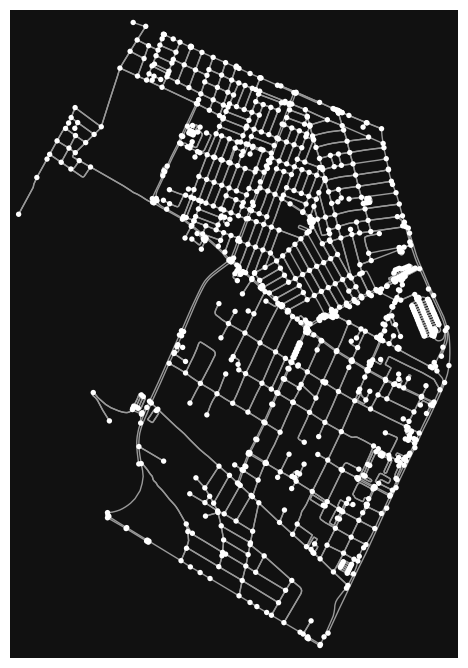

In [ ]:
# Download da rede do bairro de Candelária adequada para bicicletas
G_bike = ox.graph_from_place("Candelária, Natal, Rio Grande do Norte, Brasil", network_type="bike")
G_bike1 = ox.graph_from_place("Capim Macio, Natal, Rio Grande do Norte, Brasil", network_type="bike")

#Plot do grafo da rede de Candelária
fig, ax = ox.plot_graph(G_bike)


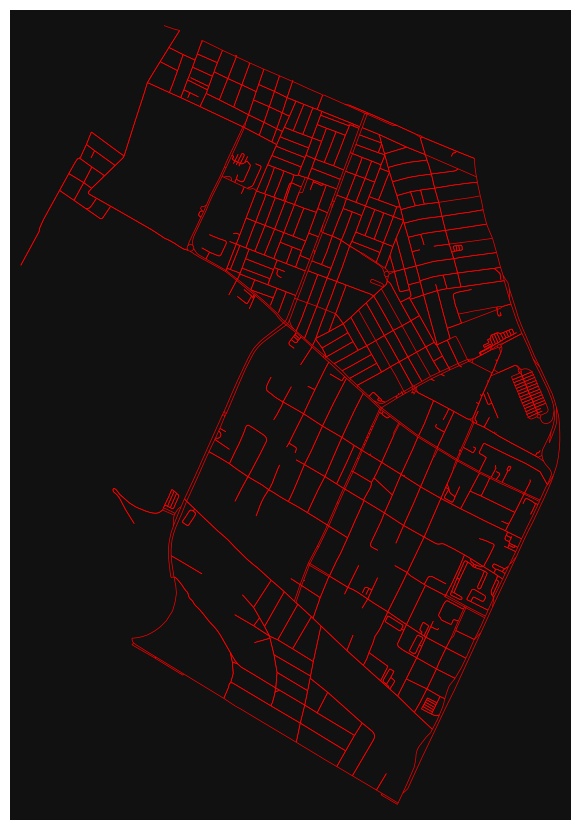

In [ ]:
#Visualização gráfica da rede de ciclismo em Candelária
fig, ax = ox.plot_graph(G_bike, figsize=(10, 10), node_size=0, edge_color="r", edge_linewidth=0.5)

#Visualização gráfica da rede de ciclismo em Capim Macio
fig, ax = ox.plot_graph(G_bike1, figsize=(10, 10), node_size=0, edge_color="b", edge_linewidth=0.5)

# Aplicação das Mérticas de Centralidade

- Usar na solução as métricas de centralidade vistas em sala de aula
e imagens da rede destacadas pelas métricas.

- Métricas Utilizadas: Degree Centrality, Closeness centrality, Betweenness Centrality, Eigenvector Centrality.



- - Degree Centrality: Mede o número de conexões diretas que um nó possui. Um nó com alto degree centrality está mais conectado e pode ser considerado mais influente ou importante na rede.

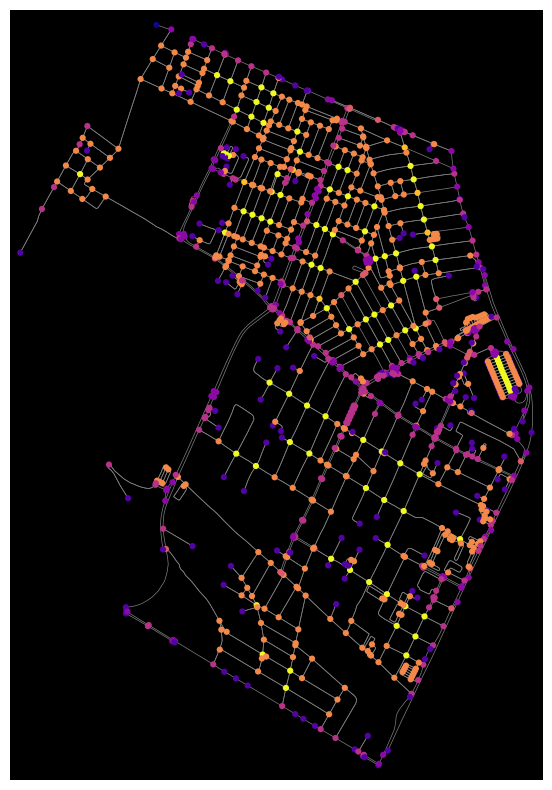

In [ ]:
# Calcular a centralidade de grau para Candelária
degree_centrality = nx.degree_centrality(G_bike)
nx.set_node_attributes(G_bike, degree_centrality1, 'degree_centrality')

# Criar uma paleta de cores para visualizar a centralidade de grau
cmap = cm.plasma  # Escolha a paleta desejada
norm = colors.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
node_colors = [cmap(norm(degree_centrality[node])) for node in G_bike.nodes()]

#Quanto mais amarelo for o nó, maior é o seu grau

# Visualizar o grafo com a centralidade de grau
fig, ax = ox.plot_graph(
    G_bike,
    node_size=20,  # Ajuste o tamanho dos nós
    node_color=node_colors,
    edge_linewidth=0.5, # Ajuste a espessura das arestas
    edge_color='gray',
    bgcolor='black', # Cor de fundo preta
    figsize=(10, 10)
)

plt.show()

- - Closeness Centrality: Avalia a proximidade de um nó em relação a todos os outros nós na rede. É calculada pela média das distâncias mais curtas do nó para todos os outros nós. Quanto maior a closeness, mais rapidamente o nó pode alcançar outros nós.

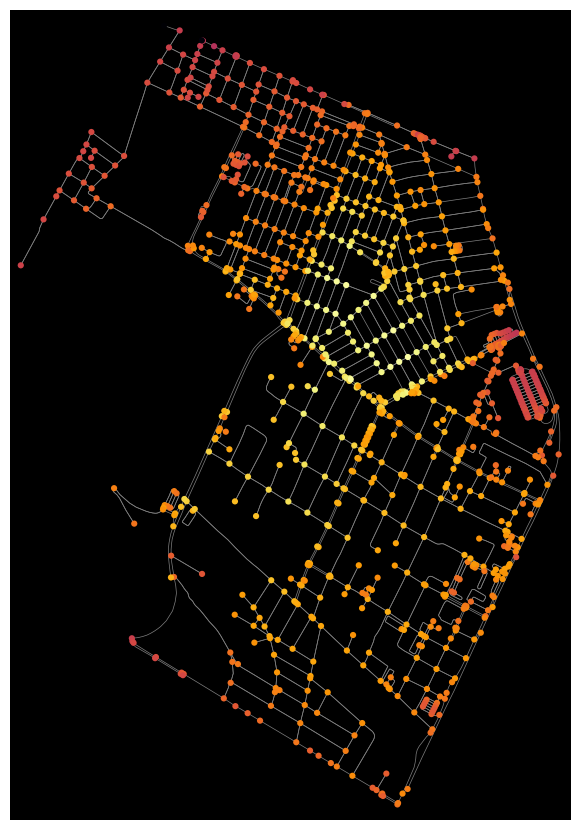

In [ ]:
# Calcular a centralidade de proximidade
closeness_centrality = nx.closeness_centrality(G_bike)
nx.set_node_attributes(G_bike, closeness_centrality, 'closeness_centrality')

# Criar uma paleta de cores
cmap = cm.inferno # Escolha a paleta de cores desejada
norm = colors.Normalize(vmin=min(closeness_centrality.values()), vmax=max(closeness_centrality.values()))

# Mapear os valores de centralidade para cores
node_colors = [cmap(norm(closeness_centrality[node])) for node in G_bike.nodes()]

# Visualização do mapa
fig, ax = ox.plot_graph(G_bike,
                       node_size=20,
                       node_color=node_colors,
                       edge_linewidth=0.5,
                       edge_color='gray',
                       bgcolor='black',
                       figsize=(10, 10))
plt.show()

- - Betweenness Centrality: Mede quantas vezes um nó aparece no caminho mais curto entre outros nós. Um nó com alta betweenness centrality atua como um "intermediário" importante na rede, conectando diferentes grupos.

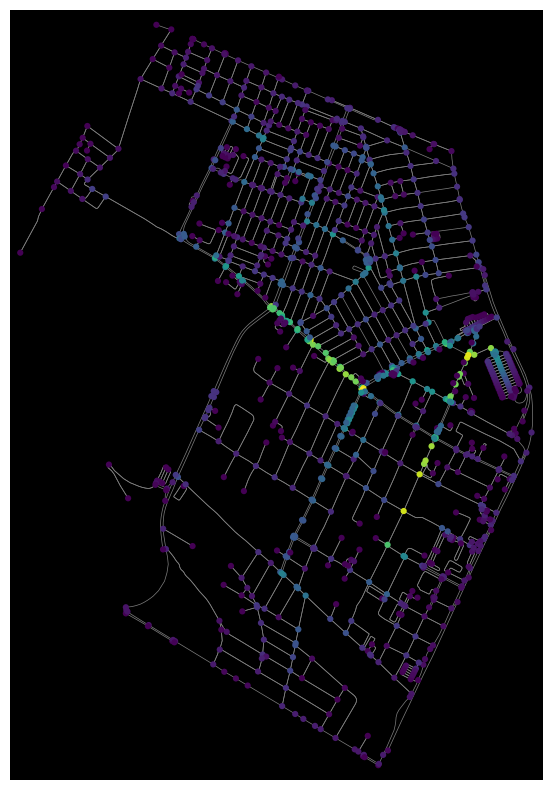

In [ ]:
# Calcular a centralidade de intermediação (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(G_bike, normalized=True, weight='length')
nx.set_node_attributes(G_bike, betweenness_centrality, 'betweenness_centrality')

# Criar uma paleta de cores para visualizar a centralidade de intermediação
cmap = cm.viridis  # Escolha a paleta desejada
norm = colors.Normalize(vmin=min(betweenness_centrality.values()), vmax=max(betweenness_centrality.values()))
node_colors = [cmap(norm(betweenness_centrality[node])) for node in G_bike.nodes()]

# Visualizar o grafo com a centralidade de intermediação
fig, ax = ox.plot_graph(
    G_bike,
    node_size=20,
    node_color=node_colors,
    edge_linewidth=0.5,
    edge_color='gray',
    bgcolor='black',
    figsize=(10, 10)
)
plt.show()

- - Eigenvector Centrality: Avalia a influência de um nó não apenas com base em suas conexões diretas, mas também na importância dos nós aos quais está conectado. Assim, um nó conectado a outros nós de alta centralidade terá um valor de eigenvector centrality mais alto.

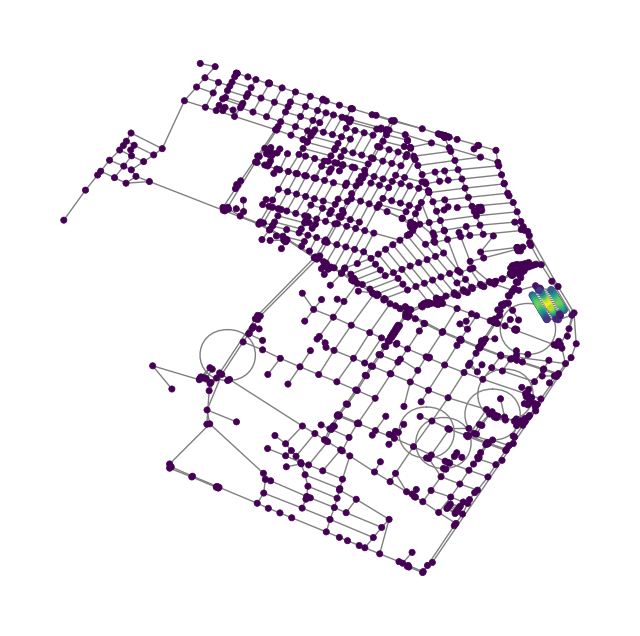

In [ ]:
# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G_bike)

# Calcular a centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# Verificar se a centralidade de autovetor foi calculada e adicionar como atributo
if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# Criar uma paleta de cores para visualizar a centralidade de autovetor
cmap = cm.viridis  # Escolha a paleta desejada
norm = colors.Normalize(vmin=min(eigenvector_centrality.values()), vmax=max(eigenvector_centrality.values()))
node_colors = [cmap(norm(eigenvector_centrality[node])) for node in G_simple.nodes()]

# Visualizar o grafo com a centralidade de autovetor
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('black')  # Define o fundo como preto
pos = {node: (data['x'], data['y']) for node, data in G_simple.nodes(data=True)}

# Desenhar os nós e arestas
nx.draw(
    G_simple,
    pos,
    ax=ax,
    node_size=20,
    node_color=node_colors,
    edge_color='gray',
    linewidths=0.5,
)
# Exibir o gráfico
plt.show()

# Aplicação na solução a análise da CDF e PDF dos graus dos nós.

#### *Cumulative Density Function (CDF)*

- - A CDF indica a probabilidade de uma variável aleatória ser menor ou igual a um determinado valor. É como se fosse uma "soma acumulada" das probabilidades até aquele ponto. A CDF é a integral da PDF.

- - Uma CDF não crescente sempre aumenta ou permanece constante à medida que o valor da variável aumenta. Seu valor varia entre 0 e 1.

### *Probability Density Function (PDF)*

- - A PDF descreve a probabilidade de uma variável aleatória contínua assumir um valor específico dentro de um intervalo. É como se fosse um "mapa de densidade" que indica onde é mais provável encontrar um determinado valor. A área sob a curva da PDF em um determinado intervalo representa a probabilidade de a variável cair nesse intervalo.

- - A PDF é sempre positiva, e sua área total sob a curva da PDF em todo o domínio da variável aleatória é sempre igual a 1, pois a probabilidade total de todos os possíveis valores é igual a 1.

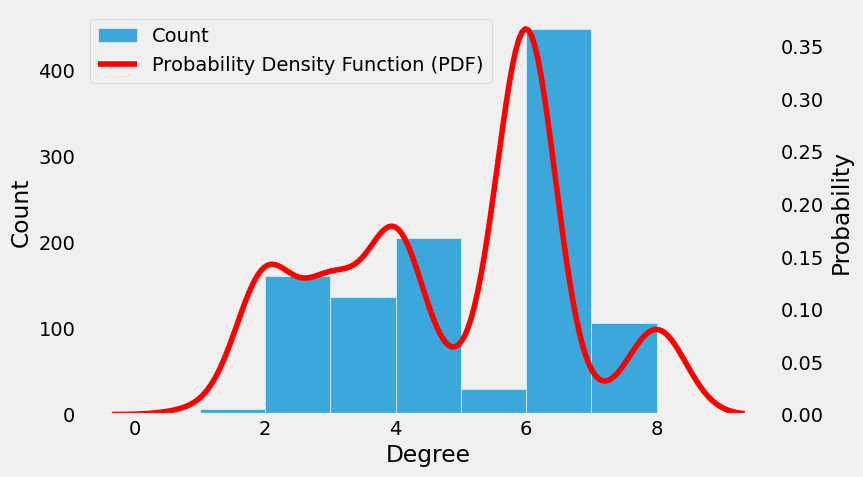

In [ ]:
#Traçando a curva da PDF

plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,5))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

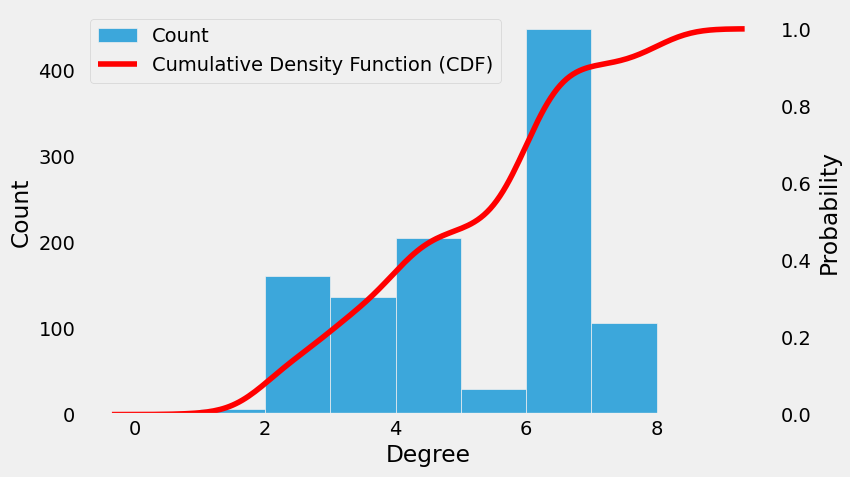

In [ ]:
#Traçando a curva da CDF

plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,5))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()


# Aplicação da análise multivariada das métricas de centralidade

- - A análise multivariada das métricas de centralidade é uma técnica estatística que permite estudar simultaneamente múltiplas métricas de centralidade em um conjunto de dados. Em outras palavras, ela nos permite analisar como diferentes medidas de importância ou influência se relacionam entre si em um determinado contexto.

- - A diagonal principal de uma matriz de distribuições mostra como cada métrica é distribuída, o que pode revelar características da rede, como a presença de nós com muitas conexões. A sobreposição das distribuições de diferentes métricas pode indicar que elas capturam informações semelhantes, como no caso de grau e betweenness. As correlações entre as métricas são mostradas fora da diagonal: valores próximos a 1 indicam correlação positiva forte, próximos a -1 indicam correlação negativa forte, e próximos a 0 indicam falta de correlação.

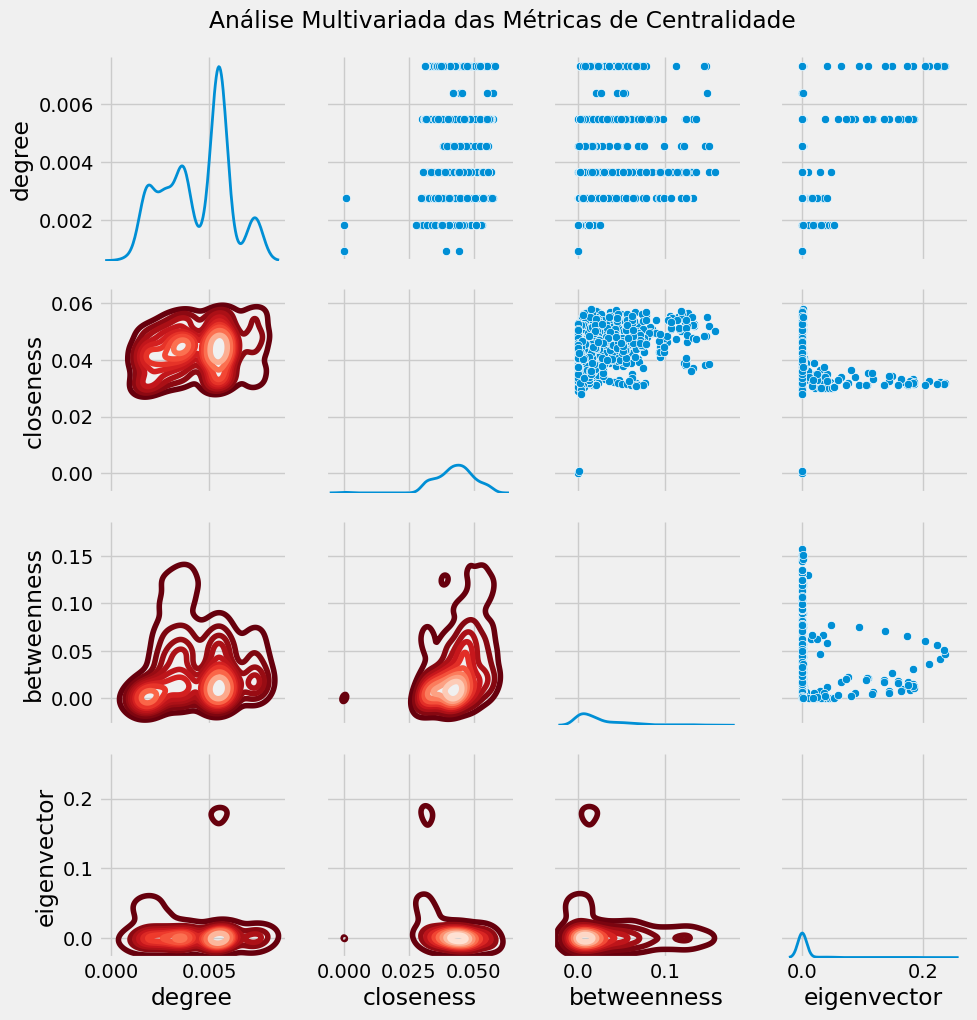

In [ ]:
# Código para aplicar a análise multivariada das métricas de centralidade

# 1. Criar um DataFrame com as métricas de centralidade
centrality_data = {
    'degree': [degree_centrality[node] for node in G_simple.nodes()],
    'closeness': [closeness_centrality[node] for node in G_simple.nodes()],
    'betweenness': [betweenness_centrality[node] for node in G_simple.nodes()],
}

if 'eigenvector_centrality' in locals():
    centrality_data['eigenvector'] = [eigenvector_centrality[node] for node in G_simple.nodes()]

# Criar o DataFrame
df = pd.DataFrame(centrality_data)

# 2. Análise multivariada com PairGrid
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)  # Plota scatterplot na parte superior
fig.map_lower(sns.kdeplot, cmap="Reds_r")  # Plota KDE na parte inferior
fig.map_diag(sns.kdeplot, lw=2, legend=False)  # Plota KDE na diagonal

plt.suptitle("Análise Multivariada das Métricas de Centralidade", y=1.02)  # Título da figura
plt.show()

# Interpretação dos resultados da análise multivariada das métricas de centralidade

- ## A análise dos resultados mostra diferentes relações entre métricas de centralidade:

1. **Degree e Closeness**: Existe uma relação positiva entre elas, sugerindo que nós com mais conexões (degree alto) tendem a ter alta proximidade com outros nós (closeness alto). No entanto, essa relação é dispersa, indicando que nem todos os nós com alto degree estão próximos de todos os outros.

2. **Betweenness e Closeness**: A relação entre essas métricas também é positiva, mas mais definida. Nós com alta betweenness (que servem como ponto de passagem em muitos caminhos curtos) tendem a ter alta closeness, com uma correlação mais forte que a observada entre degree e closeness.

3. **Eigenvector e Outras Métricas**: A centralidade eigenvector apresenta uma correlação mais fraca com degree e closeness, sugerindo que estar conectado a nós influentes (alta eigenvector) não depende fortemente do número de conexões ou proximidade. A betweenness tem uma correlação ligeiramente mais forte com eigenvector.

# Encontrando o Core/Shell da rede

- O que é o Core?
- - Nódulos Centrais: O core de uma rede é composto pelos nós mais importantes e influentes. São aqueles que possuem um alto grau de conectividade, ou seja, estão ligados a muitos outros nós.

- - Comunidades Densas: Geralmente, o core está associado a comunidades densas dentro da rede, onde os nós estão fortemente conectados entre si.

- - Alta Centralidade: Os nós do core tendem a apresentar altos valores em diversas métricas de centralidade, como degree centrality, betweenness centrality e closeness centrality.

- O que é o Shell?
- - Nódulos Periféricos: O shell é composto pelos nós menos importantes e influentes da rede. São aqueles que possuem um baixo grau de conectividade e estão localizados nas bordas da rede.

- - Conexões Fracas: Os nós do shell tendem a ter conexões mais fracas e menos numerosas com outros nós.

- - Baixa Centralidade: Os nós do shell apresentam baixos valores nas métricas de centralidade.

Nós do Core (grau > 6.61): [501791803, 503755744, 501791817, 505084231, 2115015949, 503755662, 503755597, 501824654, 505488558, 502818050, 502818024, 502818020, 502818068, 503731431, 503278498, 509901682, 7244034121, 503731430, 3801177346, 503731437, 503731440, 503731441, 700163390, 505494068, 503732237, 503732238, 503732249, 505489662, 4753154483, 4753154484, 503755255, 503755257, 505490347, 503755471, 503755395, 503755659, 503755408, 503755821, 505492177, 503755666, 503755467, 503755581, 503755565, 503755576, 505491621, 505492156, 505492488, 505492117, 535305116, 505488577, 505086618, 505087103, 505086655, 505086698, 505086737, 505087055, 505087021, 4753154488, 4753154480, 505489846, 505489854, 505490712, 505489864, 505489924, 505489868, 603601984, 505490342, 505491106, 505492474, 505492166, 505492358, 505492279, 506553350, 506553358, 506553352, 506553357, 3801177328, 506553361, 3801177319, 506553399, 4753154479, 599971677, 599971653, 509901685, 509901686, 526586208, 526586660, 59997

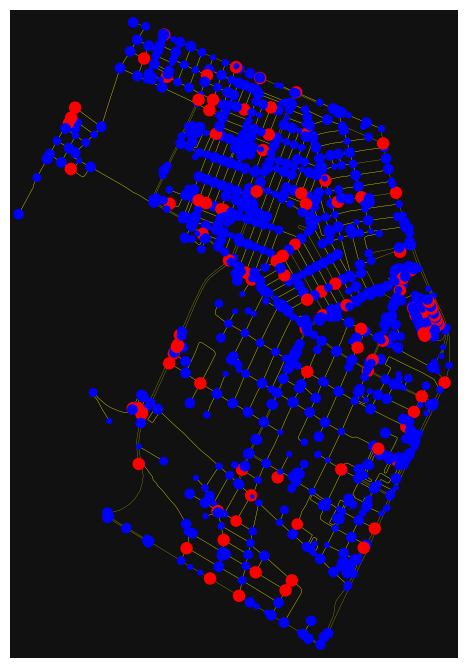

In [ ]:
# Converter a rede de OSMnx para um grafo de NetworkX
H = ox.project_graph(G_bike)

# Calcular a centralidade dos graus dos nós
degree_centrality = np.array(list(dict(H.degree()).values()))
mean_degree = np.mean(degree_centrality)
std_degree = np.std(degree_centrality)

# Definir limites para o core e shell
core_threshold = mean_degree + std_degree  # Limite superior para o core
shell_threshold = mean_degree - std_degree  # Limite inferior para o shell

# Identificar nós do core e do shell
core_nodes = [n for n, d in H.degree() if d > core_threshold]
shell_nodes = [n for n, d in H.degree() if d < shell_threshold]

# Imprimir resultados
print(f"Nós do Core (grau > {core_threshold:.2f}): {core_nodes}")
print(f"Nós do Shell (grau < {shell_threshold:.2f}): {shell_nodes}")

# Visualização da rede com o core e shell
import matplotlib.pyplot as plt

# Definir tamanhos de nós
node_color = ['r' if n in core_nodes else 'b' for n in H.nodes()]
# Definir tamanhos de nós com um fator de escala menor
node_size = [degree_centrality[i] * 10 for i in range(len(H.nodes()))]  # Alterado para 20

# Visualização da rede com o core e shell
fig, ax = ox.plot_graph(G_bike, node_color=node_color, node_size=node_size, edge_color='y', edge_linewidth=0.2)

#Interpretação do grafo Core/Shell

- ## A interpretação do grafo destaca:

1. **Agrupamentos**: O grafo mostra grupos de nós vermelhos (core) e azuis (shell). Os nós core estão mais conectados e formam uma região central densa, enquanto os nós shell, menos conectados, ficam na periferia.

2. **Conexões**: Os nós core também se conectam aos nós shell, atuando como pontes entre as áreas da rede.

3. **Nós Isolados**: Alguns nós podem estar isolados, sem conexões, não sendo classificados como core ou shell.

4. **Revelações do Grafo**:
   - **Estrutura da Rede**: Visualiza áreas densas (core) e esparsas (shell).
   - **Nós Importantes**: Os nós core, altamente conectados, podem ser locais ou entidades influentes.
   - **Fluxo de Informação**: A informação tende a fluir mais facilmente no core, devido às conexões.